

<font color='red'> Projet P10 </font>

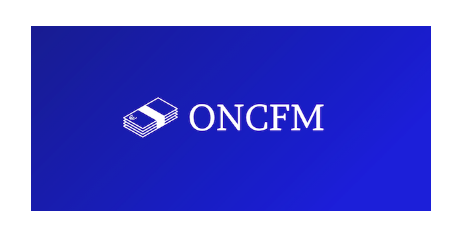

## Importation des bibliothèques

In [198]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as st

import seaborn as sns


from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import KMeans

import statsmodels.api as sm

from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error

from statsmodels.tools.tools import add_constant


import joblib


## Lecture du jeu de donnée

In [151]:
jeu=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\billets.CSV", sep=';')

In [152]:
jeu2=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\billets.CSV", sep=';')

In [153]:
jeu

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [154]:
jeu.rename(columns={'is_genuine': 'Nature_billet'}, inplace=True)

## Analyse descriptive des billets 

In [155]:
jeu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nature_billet  1500 non-null   bool   
 1   diagonal       1500 non-null   float64
 2   height_left    1500 non-null   float64
 3   height_right   1500 non-null   float64
 4   margin_low     1463 non-null   float64
 5   margin_up      1500 non-null   float64
 6   length         1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [156]:
# Nombre de billets différent

jeu['Nature_billet'].value_counts()

True     1000
False     500
Name: Nature_billet, dtype: int64

 <font color='red'>Nous avons donc 1000 vrais billets ainsi que 500 faux </font>

In [157]:
# Analyse descriptive de l'ensemble des billets 

h=jeu.columns
jeu[h].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [158]:
# Réaffectation de la colonne

# jeu['Nature_billet']=jeu['Nature_billet'].astype("string")

# séparation des billets

# vrai_billet=jeu.query('Nature_billet == ["True"]')
# faux_billet=jeu.query('Nature_billet == ["False"]')

# vrai_billet.describe()

# Méthode de régresion linéaire

In [159]:

from sklearn.linear_model import LinearRegression


In [160]:
# calcul du nombre de NAN

jeu.isna().sum()  

Nature_billet     0
diagonal          0
height_left       0
height_right      0
margin_low       37
margin_up         0
length            0
dtype: int64

In [161]:
# Observation

jeu_complet= jeu[jeu['margin_low'].notna()] # données complet sans les NAN
jeu_manquant=jeu[jeu['margin_low'].isna()] # données complet des NAN

In [162]:
# Création du modele

modeleReg=LinearRegression()


In [163]:
# préparation des données du jeu complet 

x_complet=jeu_complet.drop(columns='margin_low') # données copmlet sans margin_low
y_complet=jeu_complet['margin_low'] # variable margin_low sans les NaN

In [164]:
x_manquant=jeu_manquant.drop(columns='margin_low') # Données complet des NaN sans margin_low
x_manquant

,Nature_billet,diagonal,height_left,height_right,margin_up,length
72,True,171.94,103.89,103.45,3.25,112.79
99,True,171.93,104.07,104.18,3.14,113.08
151,True,172.07,103.80,104.38,3.02,112.93
197,True,171.45,103.66,103.80,3.62,113.27
241,True,171.83,104.14,104.06,3.02,112.36
251,True,171.80,103.26,102.82,2.95,113.22
284,True,171.92,103.83,103.76,3.23,113.29
334,True,171.85,103.70,103.96,3.00,113.36
410,True,172.56,103.72,103.51,3.12,112.95
413,True,172.30,103.66,103.50,3.16,112.95


In [165]:
# Standardisaion les données des données sans margin_low \ x_complet

scaler = StandardScaler()

x_complet_scaled = scaler.fit_transform(x_complet)



In [166]:
# Modèle de regression


modeleReg.fit(x_complet_scaled,y_complet)

LinearRegression()

In [167]:
print(modeleReg.intercept_)
print(modeleReg.coef_)

#calcul du R²
modeleReg.score(x_complet_scaled,y_complet)



4.485967190704033
[-0.538865   -0.00397444  0.00847315  0.00866882 -0.04924936 -0.00338955]


0.6168760755671029

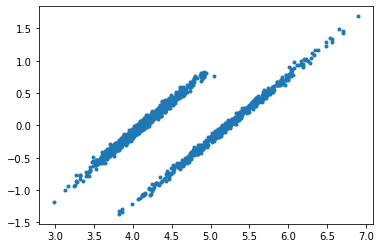

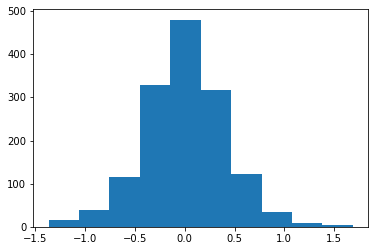

In [168]:
# résidu

plt.plot(y_complet, y_complet-modeleReg.predict(x_complet_scaled),'.')
plt.show()

plt.hist( y_complet-modeleReg.predict(x_complet_scaled))
plt.show()

In [169]:
# Test de normalité 

from scipy.stats import shapiro, jarque_bera


In [170]:
# test de shapiro 

shapiro( y_complet-modeleReg.predict(x_complet_scaled))

ShapiroResult(statistic=0.9936947822570801, pvalue=7.047739472909598e-06)

In [171]:
# test de jarque_bera

jarque_bera( y_complet-modeleReg.predict(x_complet_scaled))

Jarque_beraResult(statistic=37.99308146903517, pvalue=5.6222115851767285e-09)

In [172]:
# Transformation des données

x_manquant_scaled=scaler.transform(x_manquant)

In [173]:
# prediction des données sur x_manquant_scaled pour avoir les données complètes

y_manquant=modeleReg.predict(x_manquant_scaled)
y_manquant

array([4.06495361, 4.11199026, 4.13400328, 3.99357074, 4.1403993 ,
       4.09428392, 4.07412432, 4.12538999, 4.0807278 , 4.07363322,
       4.11897255, 4.18037978, 4.13648423, 4.05106842, 4.17837685,
       4.22555104, 4.11586845, 4.10284101, 4.08184346, 4.09276238,
       4.11250192, 4.15717623, 4.16028787, 4.12193808, 4.12353555,
       4.19842271, 4.10962313, 4.09696025, 4.13384101, 5.25968515,
       5.264817  , 5.28251853, 5.30206887, 5.20035843, 5.1754678 ,
       5.17345045, 5.24675055])

In [174]:
y_manquant2=modeleReg.predict(x_manquant_scaled)

(array([ 13., 116., 415., 399., 183., 139., 111.,  62.,  18.,   7.]),
 array([2.98 , 3.372, 3.764, 4.156, 4.548, 4.94 , 5.332, 5.724, 6.116,
        6.508, 6.9  ]),
 <BarContainer object of 10 artists>)

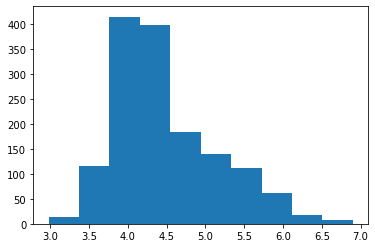

In [175]:
# Observation de la distribution qui est normale

plt.hist(jeu['margin_low'])

In [176]:
# Remplacement des données obtenue par les données manquantes


jeu.loc[jeu['margin_low'].isna(),'margin_low']=y_manquant

In [177]:
jeu.isna().sum()

Nature_billet    0
diagonal         0
height_left      0
height_right     0
margin_low       0
margin_up        0
length           0
dtype: int64

(array([ 13., 116., 438., 405., 183., 147., 111.,  62.,  18.,   7.]),
 array([2.98 , 3.372, 3.764, 4.156, 4.548, 4.94 , 5.332, 5.724, 6.116,
        6.508, 6.9  ]),
 <BarContainer object of 10 artists>)

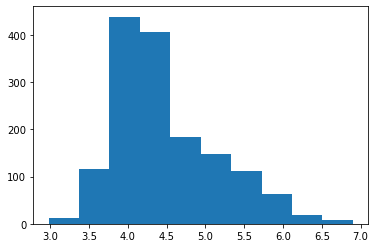

In [178]:
# Observation de la distribution identique 

plt.hist(jeu['margin_low'])

In [179]:
# Observation de la base \ base réctifier 

jeu

,Nature_billet,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [109]:
# copie de la base 

base_f=jeu.copy()

# Observation de la distribution des variables 

In [110]:
# On enleve la variable 'nature des billets'

base_f2= base_f.drop(columns='Nature_billet') 

In [111]:
# préparation des colonnes \ Observation

n = base_f2.columns



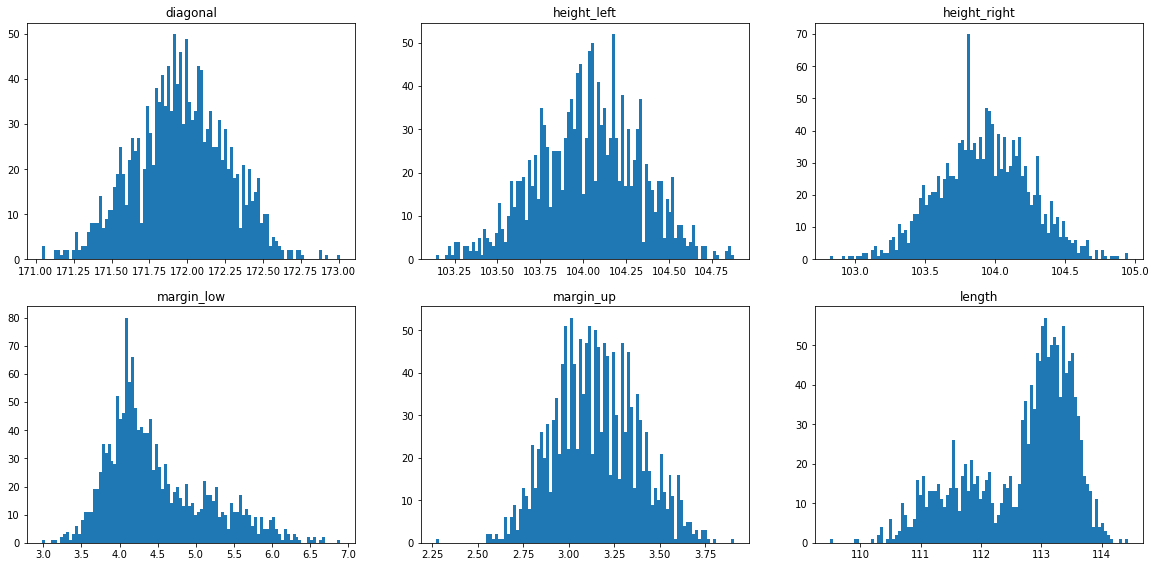

In [112]:
# Observation des outliers de chaques variables 

fig = plt.figure(figsize=(20, 20))
i=1
for col in n : 
    ax = fig.add_subplot(4,3,i)
    ax.hist(base_f2[col], bins = 100)
    ax.set_title(col)
    i+=1
plt.show()

# Observation de la corrélation des variables 

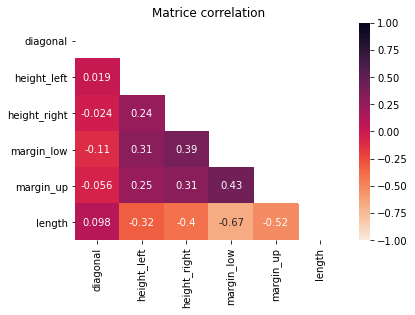

In [118]:

# Observation de la corélation entre les variables qui donne une idée de la multicolinéarité

mask = np.triu(np.ones_like(base_f2.corr(), dtype=bool)) # diagonale mis à zero avec triu \ ones_like tableau avec des uns

#affichage de la corrélation entre variables

cmap = sns.cm.rocket_r # rocket_r est une palette de couleur 

sns.heatmap(base_f2.corr(), mask = mask, annot=True, cmap =cmap,vmin=-1, vmax=1)
plt.title("Matrice correlation")
plt.show()



# Calcul du VIF

In [114]:
jeu['Nature_billet'] = jeu['Nature_billet'].map({True:0, False:1}) 


In [129]:
X

,Nature_billet,diagonal,height_left,margin_low,margin_up,length,intercept
0,0,171.81,104.86,4.52,2.89,112.83,1
1,0,171.46,103.36,3.77,2.99,113.09,1
2,0,172.69,104.48,4.40,2.94,113.16,1
3,0,171.36,103.91,3.62,3.01,113.51,1
4,0,171.73,104.28,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...
1495,1,171.75,104.38,4.42,3.09,111.28,1
1496,1,172.19,104.63,5.27,3.37,110.97,1
1497,1,171.80,104.01,5.51,3.36,111.95,1
1498,1,172.06,104.28,5.17,3.46,112.25,1


In [136]:
# VIF avec tte les variables
  
X = jeu[['Nature_billet', 'diagonal', 'height_left','margin_low','margin_up','length']] 

X['intercept'] = 1

  
vif_data = pd.DataFrame() # Création d'un tableau
vif_data["feature"] = X.columns # Récupération des collonnes
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]

vif_data = vif_data[vif_data['feature']!='intercept']

print(vif_data)

         feature       VIF
0  Nature_billet  6.135712
1       diagonal  1.025748
2    height_left  1.176425
3     margin_low  2.643794
4      margin_up  1.598297
5         length  3.591661


un VIF supérieur ou égal à 5 sera considéré comme trop grand.

In [145]:
# VIF sans la variable nature_billet
  
X = jeu.drop(columns='Nature_billet')

X['intercept'] = 1

  
vif_data = pd.DataFrame() # Création d'un tableau
vif_data["feature"] = X.columns # Récupération des collonnes
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]

vif_data = vif_data[vif_data['feature']!='intercept']

print(vif_data)


        feature       VIF
0      diagonal  1.017910
1   height_left  1.159028
2  height_right  1.259496
3    margin_low  1.921120
4     margin_up  1.417582
5        length  2.137743


Il n'y a donc pas de multicolinéarité car aucun VIF est sup à 5. On garde donc toute les variables pour notre modèle.

# PCA

In [489]:
# Importation des librairies spécifique 


from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [490]:
# reprise des valeurs de la base 

X1 = base_f2.values

In [491]:
# préparation des données 

scaler = StandardScaler()

scaler = scaler.fit(X1)

X=scaler.transform(X1)

In [492]:
# model de pca par defaut \ transformation des données

model = PCA()

X_reduced = model.fit_transform(X)

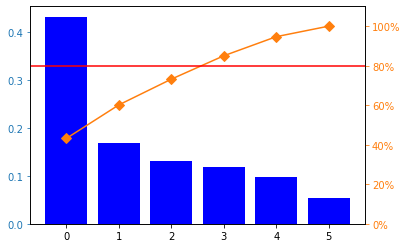

In [493]:
# Autre façonde faire plus élaboré


def pareto(data) :

    from matplotlib.ticker import PercentFormatter

    import numpy as np

    y = list(data)

    x = range(len(data))

    ycum = np.cumsum(y)/sum(y)*100

    fig, ax = plt.subplots()

    ax.bar(x,y,color="blue")

    ax2 = ax.twinx()

    ax2.plot(x,ycum, color="C1", marker="D", ms=7)

    ax2.axhline(y=80,color="r")

    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")

    ax2.tick_params(axis="y", colors="C1")

    plt.ylim(0,110)

    plt.show()


pareto(model.explained_variance_ratio_)

 <font color='red'> On peut voir qu'il y a plus 80% de l'information pour 4 variables </font>

# Définition de fonction 

In [494]:
# Définition de fonction pour utilisé le cercle des corrélations \ Récupérer sur O.C

from matplotlib.collections import LineCollection


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(12,12))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,12))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


# Cercle des correlations des variables \ Projection des billets sur les axes 

In [495]:
from sklearn import decomposition
from sklearn import preprocessing 


In [496]:
# rappel

features = base_f2.columns
X1 = base_f2.values

In [497]:
# Centrage et Réduction

std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled = std_scale.transform(X1)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=0.99)
pca.fit(X_scaled)

PCA(n_components=0.99)

In [498]:
n_comp = 5

In [499]:
#association des numéro aux libellés des variables

features_n = [value for value in range(1,(len(features)+1))]

In [500]:
for element in zip(features_n, features) :
    print (element)

(1, 'diagonal')
(2, 'height_left')
(3, 'height_right')
(4, 'margin_low')
(5, 'margin_up')
(6, 'length')


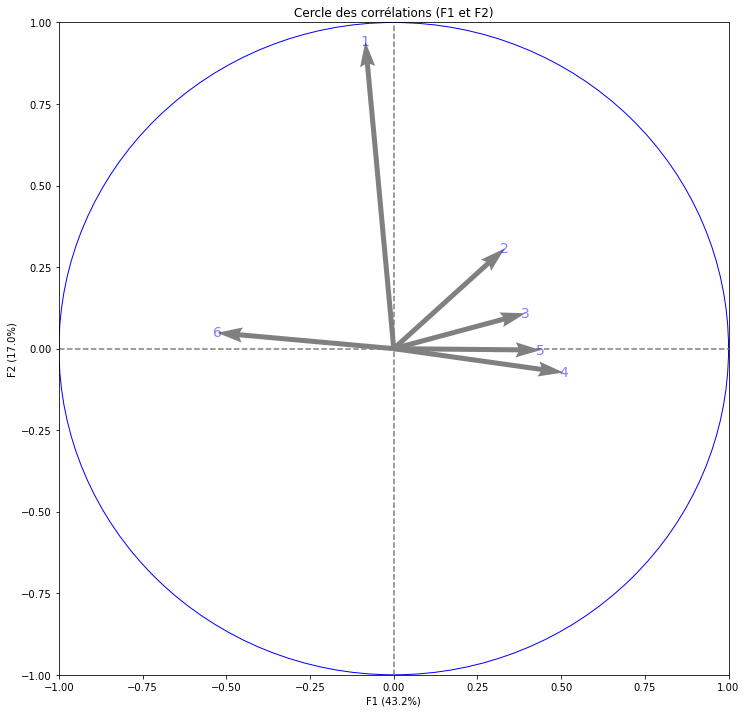

In [501]:
# Projection sur les deux premiers plans factoriels


pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels=features_n)

# Projection des billets sur les plans 

In [502]:
# Projection des billets sur les plans 

v=base_f['Nature_billet']


In [503]:
# association des numéro aux libellés des billets \ Observation

billet_n = [value for value in range(1,(len(v)+1))]


In [504]:
#légende du cercle des corrélations

for element in zip(billet_n, v) :
    print (element)

(1, True)
(2, True)
(3, True)
(4, True)
(5, True)
(6, True)
(7, True)
(8, True)
(9, True)
(10, True)
(11, True)
(12, True)
(13, True)
(14, True)
(15, True)
(16, True)
(17, True)
(18, True)
(19, True)
(20, True)
(21, True)
(22, True)
(23, True)
(24, True)
(25, True)
(26, True)
(27, True)
(28, True)
(29, True)
(30, True)
(31, True)
(32, True)
(33, True)
(34, True)
(35, True)
(36, True)
(37, True)
(38, True)
(39, True)
(40, True)
(41, True)
(42, True)
(43, True)
(44, True)
(45, True)
(46, True)
(47, True)
(48, True)
(49, True)
(50, True)
(51, True)
(52, True)
(53, True)
(54, True)
(55, True)
(56, True)
(57, True)
(58, True)
(59, True)
(60, True)
(61, True)
(62, True)
(63, True)
(64, True)
(65, True)
(66, True)
(67, True)
(68, True)
(69, True)
(70, True)
(71, True)
(72, True)
(73, True)
(74, True)
(75, True)
(76, True)
(77, True)
(78, True)
(79, True)
(80, True)
(81, True)
(82, True)
(83, True)
(84, True)
(85, True)
(86, True)
(87, True)
(88, True)
(89, True)
(90, True)
(91, True)
(92, Tru

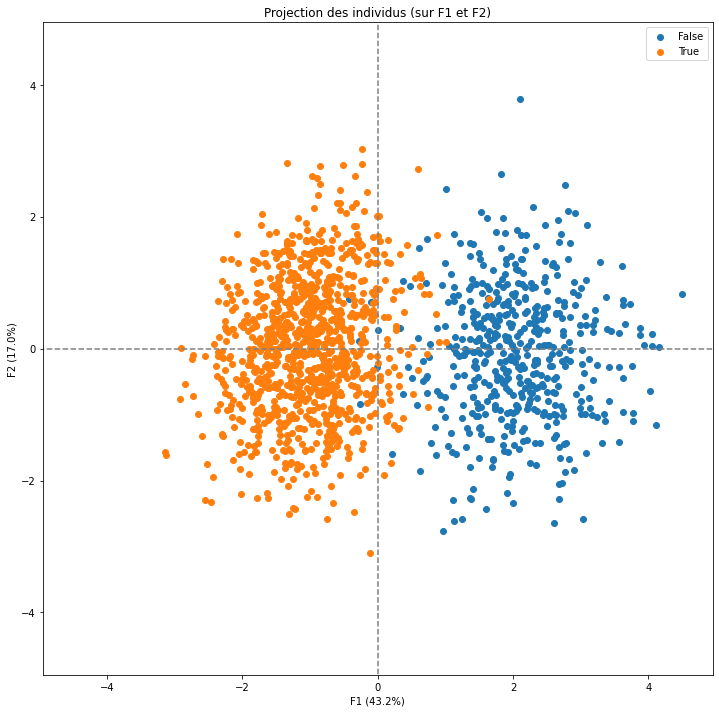

In [505]:
# Projection des billets

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],illustrative_var =jeu['Nature_billet'],alpha = 1)
plt.show()

# Anova

La longueur influe t-elle sur la nature du billet ? 

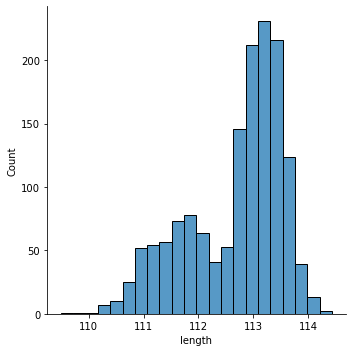

In [200]:
# Observation de la distribution

sns.displot(jeu['length'], kde=False)

On observe clairement une distribution bi-modal 

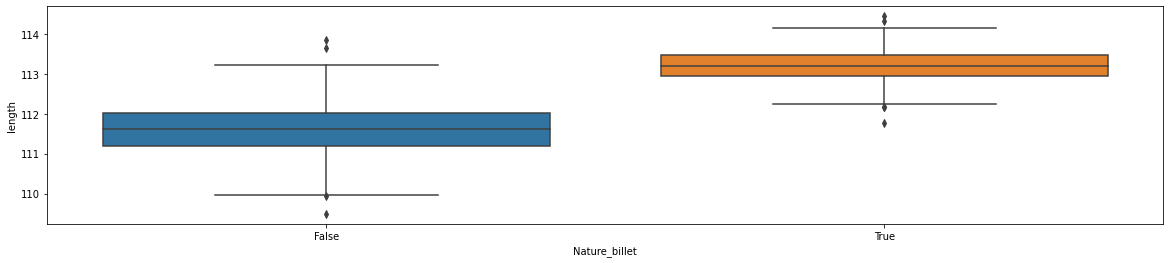

In [197]:
# La longueur, une variable determinante 

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="Nature_billet", y="length", data=jeu)

In [223]:
# observation de la moyenne des variables par rapport à la nature des billets \ Obervation générale

jeu.groupby("Nature_billet").mean()


,diagonal,height_left,height_right,margin_low,margin_up,length
Nature_billet,,,,,,
False,171.90116,104.19034,104.14362,5.216290,3.35016,111.63064
True,171.98708,103.94913,103.80865,4.116122,3.05213,113.20243


Grâce à la PCA et l'observation des résultats on peut cibler les variables qui semble le plus influencer la nature de nos billets

In [225]:
X = jeu['Nature_billet']
Y = jeu['length']

In [226]:
# Fonction O.P

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [228]:
# Coreelation entre les deux variables 

eta_squared(X,Y)

0.721284391221102

 La longueur influence grandement la nature du billet

In [232]:
jeu

,Nature_billet,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [234]:
# autre façon

import statsmodels.api

result = statsmodels.formula.api.ols('length~Nature_billet', data = jeu).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Nature_billet,1.0,823.507935,823.507935,3876.654138,0.0
Residual,1498.0,318.216390,0.212427,NaN,NaN


PR(>F) = 0 on a pas les mêmes moyenne au sein des deux groupes. On voit donc que la longueur à une influence sur la nature du  billet.

In [237]:
# indicateur en plus \ bartlett

from scipy.stats import bartlett


bartlett(jeu.length[jeu.Nature_billet == False],
        jeu.length[jeu.Nature_billet == True])
        

BartlettResult(statistic=207.23111965352825, pvalue=5.520465521419425e-47)

~H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%


# k-means


In [506]:
# Standardisation des données \ rappel

features = base_f2.columns
X1 = base_f2.values


std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled = std_scale.transform(X1)


In [507]:
#librairie
from sklearn import metrics
from sklearn import cluster
from sklearn.cluster import KMeans

# utilisation de la métrique "silhouette"
# faire varier le nombre de clusters de jusqu'à 10

res = []
for k in range(2,11):
    km = cluster.KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    res.append(metrics.silhouette_score(X1,km.labels_))

print(res)


[0.5042628967741967, 0.21305945264789883, 0.203991326329894, 0.10043387511757243, 0.09429815044290664, 0.08568605045626926, 0.08874443568436698, 0.08385754647228927, 0.08261844139200866]


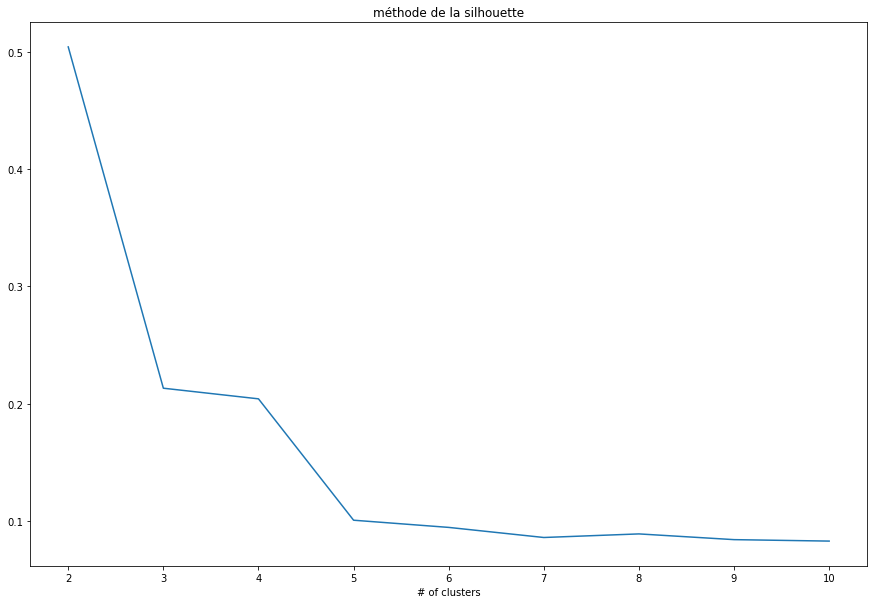

In [508]:
# Méthode de la silouette \ Représentation graphique

fig = plt.figure(figsize=(15,10))
plt.title("méthode de la silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

On a clairement la distinction avec deux clusters

In [509]:
# méthode des centre mobile

km = cluster.KMeans(n_clusters=2, random_state=0)
km.fit(X_scaled)


KMeans(n_clusters=2, random_state=0)

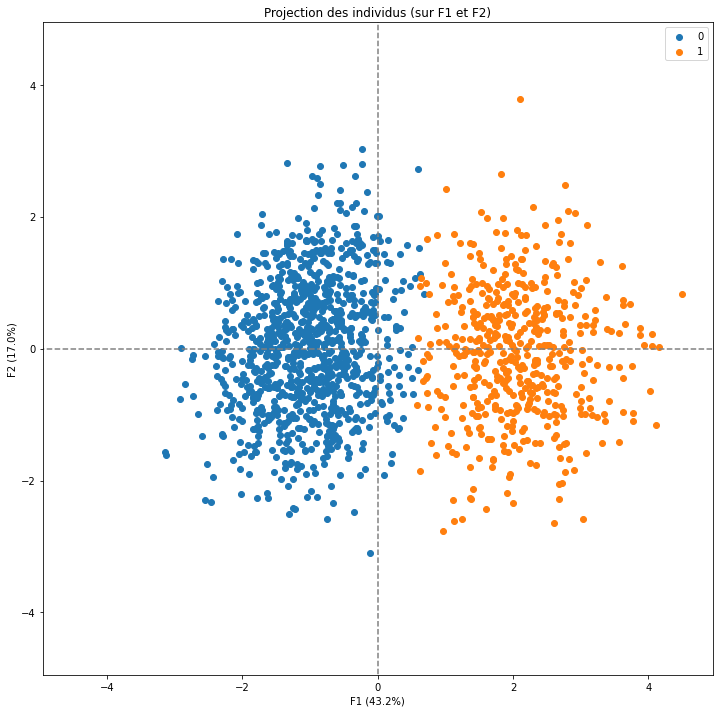

In [510]:
# Projection du k-means \ autre représentation 

# Récupération des plans factoriels de départ \ ilustrative_var = tableau du k_means


X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],illustrative_var =km.labels_ ,alpha = 1)
plt.show()

Grâce au 1er plan on peut distingué les vrais des faux billets

In [511]:
# création de la colonne qui distingue les vrais des faux billets issue du K-means

#jeu['groupe_K_means']=km.labels_
#jeu


In [512]:
# difference entre les résultats du k-means et des vrais billets

pd.crosstab(km.labels_,jeu['Nature_billet'])

Nature_billet,False,True
row_0,,
0,14,990
1,486,10


In [513]:
# reussite du modèle non supervisé 

(990+486)/1500


0.984

# Régression logistique 

In [514]:
# standardisation des données

features = base_f2.columns
X1 = base_f2.values


std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled = std_scale.transform(X1)


In [515]:
joblib.dump(std_scale,'std_scale.joblib')

['std_scale.joblib']

In [516]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

On récupére la cible qui est stockée dans y et les variables explicatives qui sont stockées dans x.

In [517]:
jeu

,Nature_billet,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [518]:
y=jeu['Nature_billet']

In [519]:
x=jeu.drop(columns=['Nature_billet'])


In [520]:
lr = LogisticRegression()


In [521]:
lr.fit(x,y)

LogisticRegression()

In [522]:
pred = lr.predict(x)
pred

array([False,  True,  True, ..., False, False, False])

In [523]:
# Croisement entre les predictions du modèle et les vrais données

pd.crosstab(lr.predict(x),y)

Nature_billet,False,True
row_0,,
False,491,5
True,9,995


In [353]:
# Précision suivant crosstab

(491+995)/1500

0.9906666666666667

In [524]:
# affectation en int pour l'analyse

y_a=y.replace([True, False],[0,1])
y_a

0       0
1       0
2       0
3       0
4       0
       ..
1495    1
1496    1
1497    1
1498    1
1499    1
Name: Nature_billet, Length: 1500, dtype: int64

In [525]:
# Affectation en dataFrame de la prediction des billets réaffectation en int pour l'analyse

pred_2 = pd.DataFrame(pred)
pred_2=pred_2.replace([True, False],[0,1])
pred_2

,0
0,1
1,0
2,0
3,0
4,0
...,...
1495,1
1496,1
1497,1
1498,1


In [526]:
# Erreur quadratique 
    
Y_true = y_a # affectation des billets de base 
  
Y_pred = pred_2 # prediction de l'affectation suite à la régréssion  
  
mean_squared_error(Y_true,Y_pred)



0.009333333333333334

In [242]:
# Rapel \ Récupération des modèles 

In [243]:
joblib.dump(std_scale,'std_scale.joblib')

NameError: name 'std_scale' is not defined

In [ ]:
# téléchargement du jeu final

# jeu.to_csv("jeu_temoin.csv")

In [ ]:
# Récupéraion du modèle de regression

joblib.dump(lr,"lr.joblib")


In [ ]:
# Récupéraion du modèle issue du k-means 

joblib.dump(km,'km.joblib')